In [1]:
%load_ext fortranmagic

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [3]:
path =os.path.abspath('/home/sdruci/QIC/QIC/01_Assignement/matrix_performance2000.dat')

df = pd.read_csv(path, sep=r'\s+', header=None, names=['Explicit', 'Column-major', 'MATMUL'], skiprows=1)   

In [4]:
df.head()

,Explicit,Column-major,MATMUL
0,0.004781,0.005593,0.000717
1,0.042029,0.041329,0.001013
2,0.105928,0.108444,0.002598
3,0.233770,0.299204,0.005799
4,0.463359,0.506558,0.009541


In [5]:
explicit = np.array(df['Explicit'])
column = np.array(df['Column-major'])
matmul = np.array(df['MATMUL'])

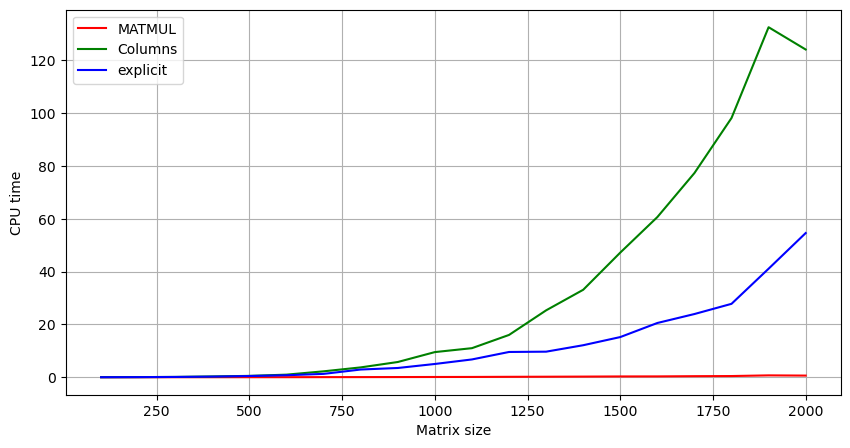

In [6]:
x = np.arange(1,len(matmul)+1)*100

plt.figure(figsize=(10,5))
plt.plot(x,matmul, color='red', label='MATMUL')
plt.plot(x,column, color='green', label='Columns')
plt.plot(x,explicit, color='blue', label='explicit')
plt.ylabel("CPU time")
plt.xlabel("Matrix size")
plt.legend()
plt.grid()
plt.show()

Now I try to highlight the exponential trend of the CPU time versus the matrix size. To do so, I just use the MATMUL module of fortran, since it is the fastest one, and I scale the size of the matrix up to $n=10000$.

In [7]:
path =os.path.abspath('/home/sdruci/QIC/QIC/01_Assignement/limit_matmul_max_size_10000.dat')

df = pd.read_csv(path, sep=r'\s+', header=None, names=['MATMUL'], skiprows=1)   

In [8]:
matmul = np.array(df['MATMUL'])

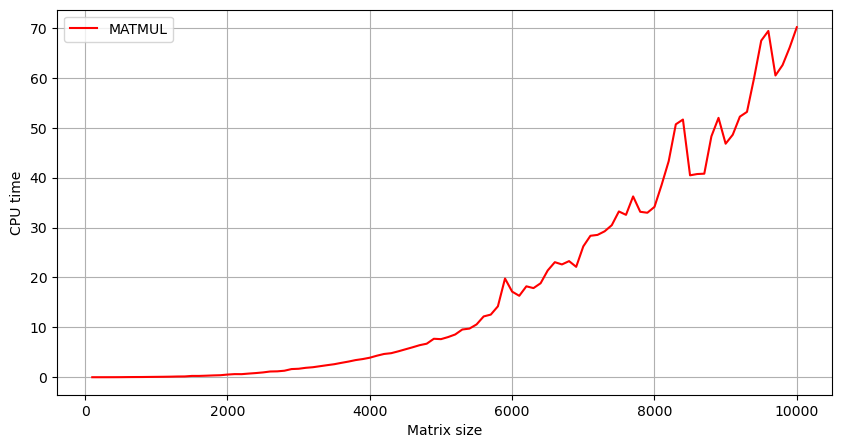

In [9]:
x = np.arange(1,len(matmul)+1)*100



plt.figure(figsize=(10,5))
plt.plot(x,matmul, color='red', label='MATMUL')
plt.ylabel("CPU time")
plt.xlabel("Matrix size")
plt.legend()
plt.grid()
plt.show()

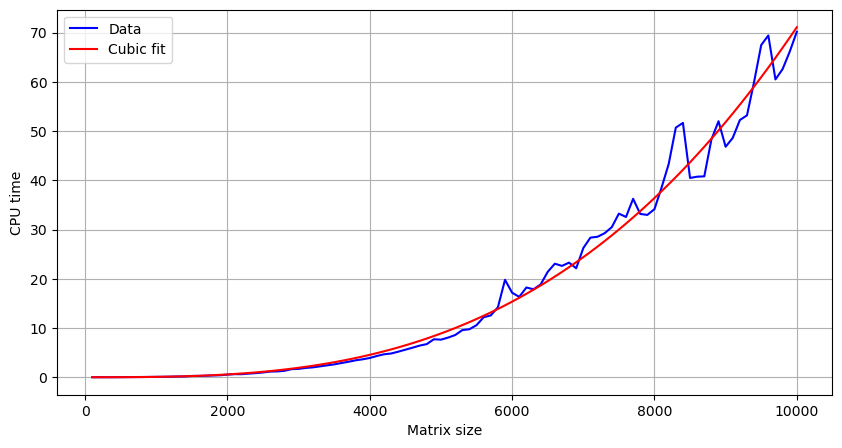

In [12]:
def exp_decr(x, ampl, tau):
    return ampl*np.exp(x/tau)

def cube(x,ampl):
    return ampl*(x**3)

popt_stat_1, pcov_stat1 = curve_fit(cube, x, matmul, p0=[70])
ampl = popt_stat_1
error = np.sqrt(np.diag(pcov_stat1))


fit_stat_1 = cube(x, *popt_stat_1)

plt.figure(figsize=(10,5))
plt.plot(x, matmul, linestyle='-', color='b', label='Data') 
plt.plot(x, fit_stat_1, color= 'red', label=f'Cubic fit')
plt.ylabel("CPU time")
plt.xlabel("Matrix size")
plt.legend()
plt.grid()
plt.show()

### Flag analysis

In [17]:
path_o1 =os.path.abspath('/home/sdruci/QIC/QIC/01_Assignement/flag_01_explicit_2500.dat')
df_o1 = pd.read_csv(path_o1, sep=r'\s+', header=None, names=['Explicit'], skiprows=1)   
flag_o1 = np.array(df_o1['Explicit'])

path_o2 =os.path.abspath('/home/sdruci/QIC/QIC/01_Assignement/flag_02_explicit_2500.dat')
df_o2 = pd.read_csv(path_o2, sep=r'\s+', header=None, names=['Explicit'], skiprows=1)   
flag_o2 = np.array(df_o2['Explicit'])

path_o3 =os.path.abspath('/home/sdruci/QIC/QIC/01_Assignement/flag_03_explicit_2500.dat')
df_o3 = pd.read_csv(path_o3, sep=r'\s+', header=None, names=['Explicit'], skiprows=1)   
flag_o3 = np.array(df_o3['Explicit'])

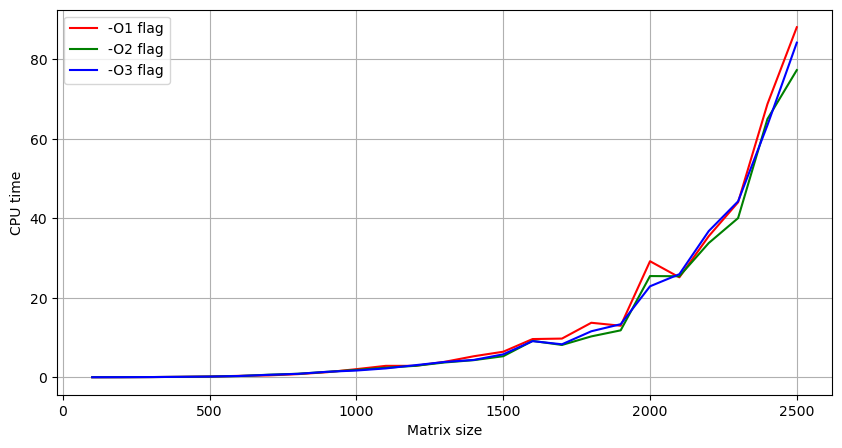

In [18]:
x = np.arange(1,len(flag_o1)+1)*100

plt.figure(figsize=(10,5))
plt.plot(x,flag_o1, color='red', label='-O1 flag')
plt.plot(x,flag_o2, color='green', label='-O2 flag')
plt.plot(x,flag_o3, color='blue', label='-O3 flag')
plt.ylabel("CPU time")
plt.xlabel("Matrix size")
plt.legend()
plt.grid()
plt.show()